In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
%%time
df = pd.read_csv('../data/train.csv')

CPU times: user 1min 30s, sys: 52.7 s, total: 2min 22s
Wall time: 2min 29s


In [3]:
df.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1


In [30]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [4]:
# Original dataframe contains around 55M rows. Creates too much complications with 
# EDA, therefore bootstrap of dataframe is going to be perfomed. 
boost_df = df.sample(frac=0.0001, replace=True, random_state=1)

In [5]:
boost_df.shape

(5542, 8)

In [6]:
boost_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5542.000000,5542.000000,5542.000000,5541.000000,5541.000000,5542.000000
mean,11.503482,-72.391227,39.850534,-72.351223,39.835910,1.719596
std,9.556624,10.826510,6.361808,10.948144,6.407913,1.344627
min,-10.900000,-75.424156,-74.002922,-74.362765,-73.991910,0.000000
25%,6.000000,-73.992216,40.734775,-73.991215,40.734007,1.000000
50%,8.500000,-73.981743,40.752565,-73.979900,40.753354,1.000000
75%,12.900000,-73.967286,40.767740,-73.963595,40.768082,2.000000
max,93.000000,40.781725,41.366138,40.733570,41.366138,6.000000


In [49]:
boost_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [51]:
boost_df.pickup_longitude.astype('float64')
boost_df.pickup_latitude.astype('float64')
boost_df.dropoff_longitude.astype('float64')
boost_df.dropoff_latitude.astype('float64')

46265381    40.768975
55017707    40.763971
6762380     40.750046
45880392    40.753664
491263      40.781742
              ...    
53333113    40.761212
32825890    40.751852
31624163    40.785330
51265766    40.754857
54866737    40.784764
Name: dropoff_latitude, Length: 5541, dtype: float64

In [52]:
boost_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

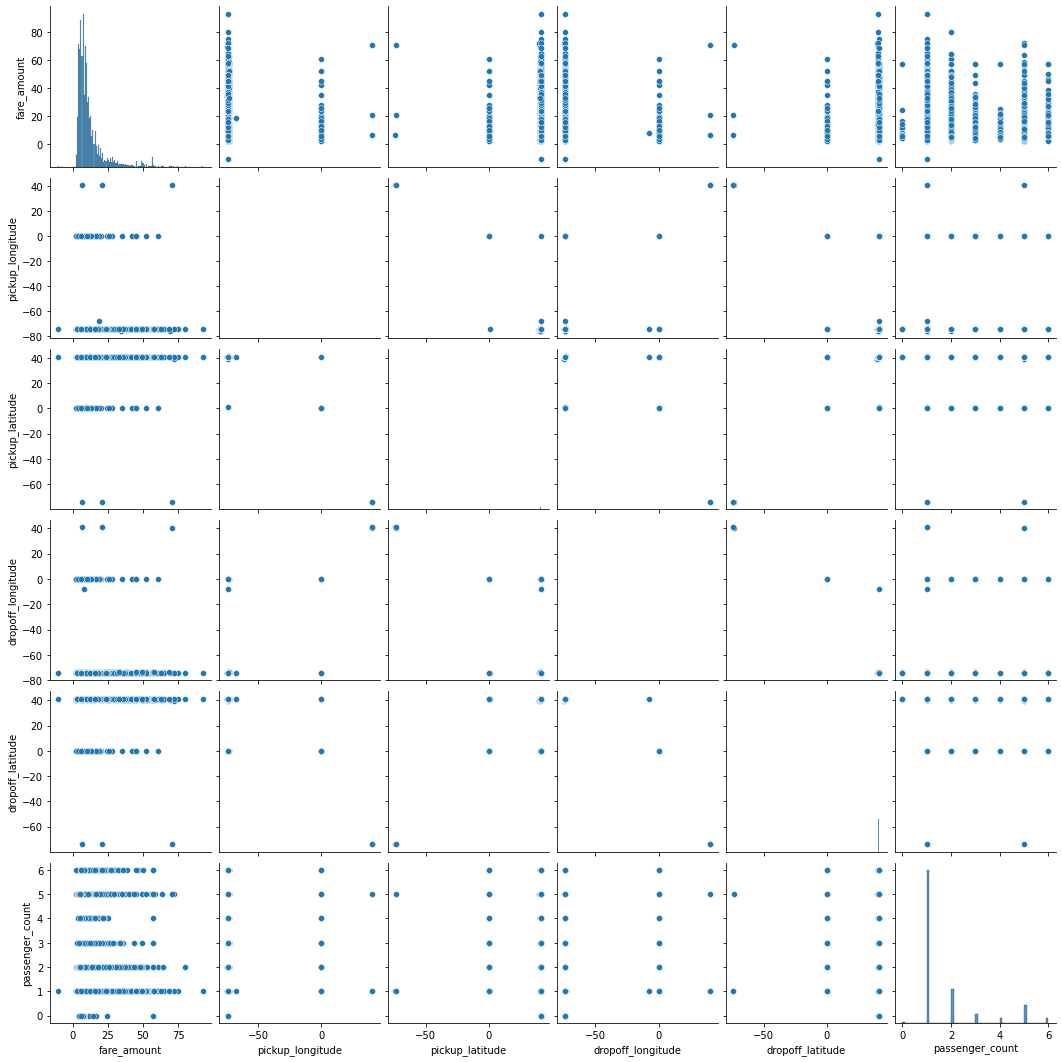

In [7]:
sns.pairplot(boost_df)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


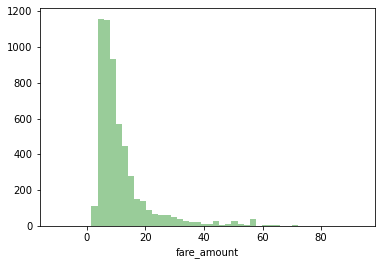

In [109]:
sns.distplot(boost_df['fare_amount'], kde=False, color='green')
plt.savefig('../images/fare_hist.png',bbox_inches = 'tight');

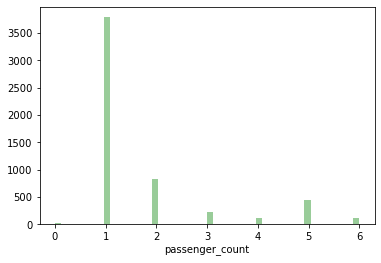

In [110]:
sns.distplot(boost_df['passenger_count'], kde=False, color='green')
plt.savefig('../images/passenger_hist.png',bbox_inches = 'tight');

In [31]:
# Creating boostrap sample with .001 of df
boost_df_b = df.sample(frac=0.001, replace=True, random_state=1)

In [53]:
# make sure to convert objects to floats
boost_df_b.pickup_longitude.astype('float64')
boost_df_b.pickup_latitude.astype('float64')
boost_df_b.dropoff_longitude.astype('float64')
boost_df_b.dropoff_latitude.astype('float64')

46265381    40.768975
55017707    40.763971
6762380     40.750046
45880392    40.753664
491263      40.781742
              ...    
52414542    40.740685
36014879    40.771562
7784064     40.714477
50562089    40.811427
17107124    40.727699
Name: dropoff_latitude, Length: 55423, dtype: float64

In [63]:
boost_df_b.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

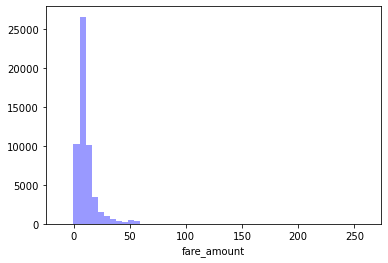

In [33]:
sns.distplot(boost_df_b['fare_amount'], kde=False, color='b');

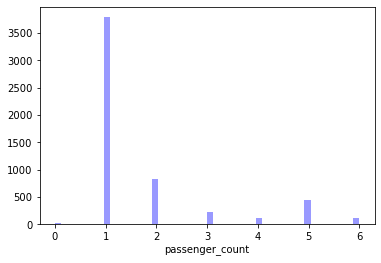

In [34]:
sns.distplot(boost_df['passenger_count'], kde=False, color='b');

### Negative Values

In [54]:
# Find all negative values for fare in both boostrap df
print(f'boost_df : {boost_df.shape}')
print(f'boost_df_b : {boost_df_b.shape}')

boost_df : (5541, 8)
boost_df_b : (55423, 8)


In [55]:
boo_1 = boost_df[boost_df['fare_amount'] >= 0]
boo_2 = boost_df_b[boost_df_b['fare_amount'] >= 0]
print(f'boo_1 : {boo_1.shape}')
print(f'boo_2 : {boo_2.shape}')

boo_1 : (5540, 8)
boo_2 : (55421, 8)


In [56]:
# boostraped with higer sample going to be used for further EDA steps
boost_df_b = boo_2

### Missing values 

In [57]:
boost_df_b.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [58]:
boost_df_b = boost_df_b.dropna()

In [59]:
boost_df_b.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

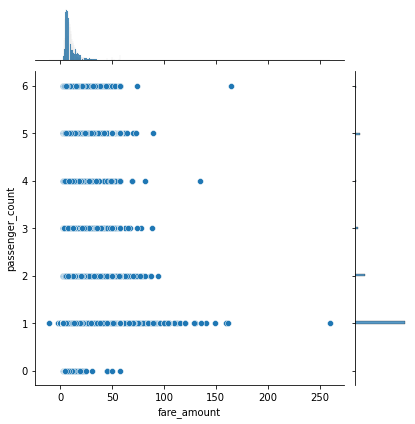

In [43]:
sns.jointplot(data=boost_df_b, x="fare_amount", y="passenger_count", )

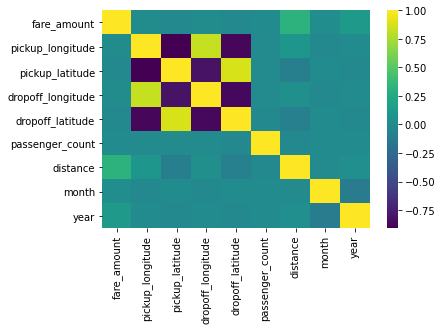

In [111]:
# heatmaps

# calculate the correlation matrix
corr = boost_df_b.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='viridis')
plt.savefig('../images/corr.png',bbox_inches = 'tight');

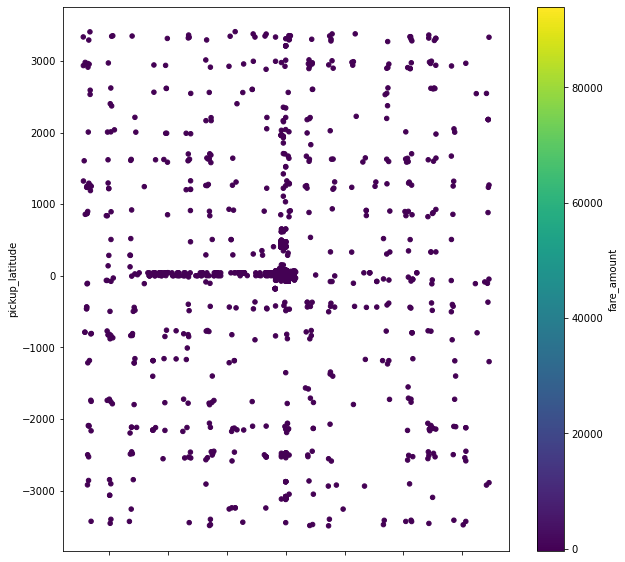

In [27]:
# df.plot.scatter('pickup_longitude', 'pickup_latitude', c= 'fare_amount', cmap='viridis', figsize=(10,10));

In [70]:
# Extracting distance based on coordinates
# Reference from URL: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

def distance_loc(lat1, lon1, lat2, lon2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [71]:
# Test on small df 
list_distance = []
for row in boost_df_b.itertuples():
    calc_dist =  distance_loc(row[4], row[5], row[6], row[7])
    list_distance.append(calc_dist)

In [72]:
len(list_distance)

55421

In [77]:
list_distance[:5]

[51.98970453857017,
 89.08261695919923,
 36.216023112567,
 151.51850698836296,
 49.35931923611477]

In [73]:
boost_df_b.shape

(55421, 8)

## Feature Engineering 

In [78]:
# Create new column distance based on the list created
# distance based on kilometers
boost_df_b['distance'] = pd.Series(list_distance, index=boost_df_b.index) 


In [79]:
boost_df_b.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
46265381,2013-03-02 18:04:10.0000006,18.0,2013-03-02 18:04:10 UTC,-73.988898,40.721670,-73.985762,40.768975,1,51.989705
55017707,2009-06-12 23:00:29.0000006,9.7,2009-06-12 23:00:29 UTC,-73.985116,40.742225,-73.998634,40.763971,3,89.082617


In [81]:
# Extracting the year and month of datetime
# Reference used for how to extract dates URL: https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
import datetime

boost_df_b['month'] = pd.DatetimeIndex(boost_df_b['pickup_datetime']).month
boost_df_b['year'] = pd.DatetimeIndex(boost_df_b['pickup_datetime']).year

In [82]:
boost_df_b.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,month,year
46265381,2013-03-02 18:04:10.0000006,18.0,2013-03-02 18:04:10 UTC,-73.988898,40.721670,-73.985762,40.768975,1,51.989705,3,2013
55017707,2009-06-12 23:00:29.0000006,9.7,2009-06-12 23:00:29 UTC,-73.985116,40.742225,-73.998634,40.763971,3,89.082617,6,2009


In [84]:
boost_df_b.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
month                  int64
year                   int64
dtype: object

In [85]:
# Convert datatime to type datetime
boost_df_b['pickup_datetime'] = boost_df_b['pickup_datetime'].astype('datetime64[ns]')

In [86]:
boost_df_b.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
distance                    float64
month                         int64
year                          int64
dtype: object

In [87]:
boost_df_b['pickup_datetime'] = boost_df_b['pickup_datetime'].astype('datetime64[ns]')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,month,year
46265381,2013-03-02 18:04:10.0000006,18.0,2013-03-02 18:04:10,-73.988898,40.721670,-73.985762,40.768975,1,51.989705,3,2013
55017707,2009-06-12 23:00:29.0000006,9.7,2009-06-12 23:00:29,-73.985116,40.742225,-73.998634,40.763971,3,89.082617,6,2009


In [93]:
boost_df_b.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,month,year
count,55421.000000,55421.000000,55421.000000,55421.000000,55421.000000,55421.000000,55421.000000,55421.000000,55421.000000
mean,11.334376,-72.535498,39.937360,-72.550304,39.941645,1.684235,170.155647,6.270674,2011.735967
std,9.669331,10.745864,6.343562,11.370345,6.255814,1.311610,561.717549,3.444672,1.863045
min,0.000000,-735.166665,-74.011078,-1183.878465,-74.014492,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992163,40.735192,-73.991356,40.734182,1.000000,41.339728,3.000000,2010.000000
50%,8.500000,-73.981888,40.752642,-73.980226,40.753192,1.000000,82.151506,6.000000,2012.000000
75%,12.500000,-73.967330,40.766990,-73.963820,40.767943,2.000000,153.645431,9.000000,2013.000000
max,260.000000,40.794097,468.183332,40.838642,404.916667,6.000000,19970.469475,12.000000,2015.000000


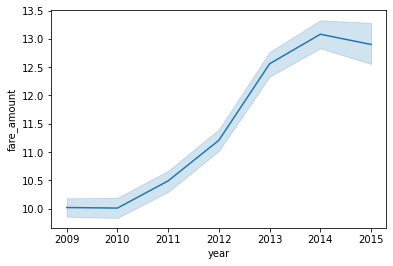

In [112]:
sns.lineplot(data=boost_df_b, x="year", y="fare_amount")
plt.savefig('../images/year_plt.png',bbox_inches = 'tight');

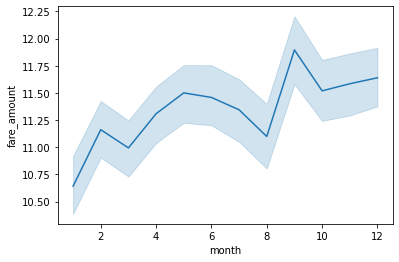

In [113]:
sns.lineplot(data=boost_df_b, x="month", y="fare_amount")
plt.savefig('../images/month_plt.png',bbox_inches = 'tight');

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


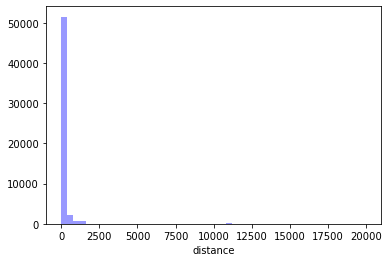

In [95]:
sns.distplot(boost_df_b['distance'], kde=False, color='b');

In [104]:
# Using max and min to remove extreme values
max_val = 2500
min_val = boost_df_b['distance'].max()

boost_df_b['distance'] = boost_df_b['distance'].apply(lambda x: None if ((x == max_val) or (x == min_val)) else x)

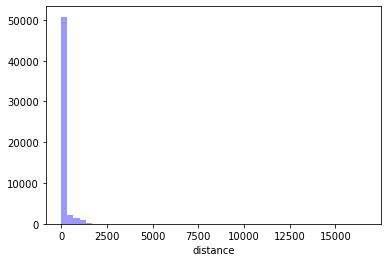

In [105]:
sns.distplot(boost_df_b['distance'], kde=False, color='b');

In [106]:
# Drop again all nan from boostrap dataframe
boost_df_b.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             2
month                0
year                 0
dtype: int64

In [107]:
boost_df_b = boost_df_b.dropna()

### Creating modeling Dataframe

In [108]:
mod_df = boost_df_b[['fare_amount', 'passenger_count', 'distance', 'month', 'year']]
mod_df.to_csv('../data/mod_dataset.csv', index=False)